In [30]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder


In [31]:
df=sb.competitions()

In [32]:
df = df.sort_values('competition_id')


In [33]:
df.head(60)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2025-04-23T14:36:29.347042,2021-06-13T16:17:31.694,None,2025-04-23T14:36:29.347042
65,2,44,England,Premier League,male,False,False,2003/2004,2025-06-24T13:53:07.585114,2021-06-13T16:17:31.694,None,2025-06-24T13:53:07.585114
60,7,27,France,Ligue 1,male,False,False,2015/2016,2024-12-16T08:48:23.066123,None,None,2024-12-16T08:48:23.066123
58,7,235,France,Ligue 1,male,False,False,2022/2023,2024-12-19T13:56:45.683863,2025-06-30T02:31:32.046070,2025-06-30T02:31:32.046070,2024-12-19T13:56:45.683863
59,7,108,France,Ligue 1,male,False,False,2021/2022,2025-06-15T12:56:15.594872,2025-06-15T13:02:45.341609,2025-06-15T13:02:45.341609,2025-06-15T12:56:15.594872
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
48,11,22,Spain,La Liga,male,False,False,2010/2011,2025-06-24T13:51:54.910296,2021-06-13T16:17:31.694,None,2025-06-24T13:51:54.910296
54,11,37,Spain,La Liga,male,False,False,2004/2005,2025-06-24T13:48:43.998096,2021-06-13T16:17:31.694,None,2025-06-24T13:48:43.998096
53,11,38,Spain,La Liga,male,False,False,2005/2006,2025-06-24T14:05:07.849675,2021-06-13T16:17:31.694,None,2025-06-24T14:05:07.849675


In [34]:


# Specify competition_id
competition_id = 11  # Replace with your desired competition ID

# Fetch all available seasons for the competition
competitions = sb.competitions()
seasons = competitions[competitions['competition_id'] == competition_id]['season_id']

# List to store all matches and events
all_events = []

# Loop through each season and fetch matches and events
for season_id in tqdm(seasons, desc="Processing Seasons"):
    try:
        # Fetch matches for the current season
        matches = sb.matches(competition_id=competition_id, season_id=season_id)
        
        # Loop through matches and fetch events
        for match_id in matches['match_id']:
            try:
                # Fetch events for the current match
                events = sb.events(match_id=match_id)
                
                # Add match_id, home_team, and away_team to the events DataFrame
                home_team = matches[matches['match_id'] == match_id]['home_team'].values[0]
                away_team = matches[matches['match_id'] == match_id]['away_team'].values[0]
                
                events['match_id'] = match_id
                events['home_team'] = home_team
                events['away_team'] = away_team
                
                # Append the events to the list
                all_events.append(events)
            except Exception as e:
                print(f"Error fetching events for match_id {match_id}: {e}")
    except Exception as e:
        print(f"Error fetching matches for season_id {season_id}: {e}")

# Combine all events into a single DataFrame
if all_events:
    e_df = pd.concat(all_events, ignore_index=True)
    print(e_df.head())
else:
    print("No events data fetched.")


Processing Seasons: 100%|██████████████████████████████████████████████████████████████| 18/18 [10:53<00:00, 36.31s/it]


  50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0   NaN                NaN                  NaN                     NaN   
1   NaN                NaN                  NaN                     NaN   
2   NaN                NaN                  NaN                     NaN   
3   NaN                NaN                  NaN                     NaN   
4   NaN                NaN                  NaN                     NaN   

  ball_recovery_recovery_failure carry_end_location clearance_aerial_won  \
0                            NaN                NaN                  NaN   
1                            NaN                NaN                  NaN   
2                            NaN                NaN                  NaN   
3                            NaN                NaN                  NaN   
4                            NaN                NaN                  NaN   

  clearance_body_part clearance_head clearance_left_foot  ... shot_redirect  \
0            

In [35]:
e_df

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_redirect,shot_follows_dribble,goalkeeper_success_in_play,goalkeeper_lost_in_play,half_start_late_video_start,player_off_permanent,goalkeeper_lost_out,goalkeeper_success_out,half_end_early_video_end,goalkeeper_saved_to_post
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3136479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3136480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3136481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Filter shot events
shots = e_df[e_df['type'] == 'Shot']


In [37]:
# Initialize home and away scores and game_state in the shots DataFrame using .loc
shots.loc[:, 'home_score'] = 0
shots.loc[:, 'away_score'] = 0
shots.loc[:, 'game_state'] = 'tied'  # Default game state is 'tied'

# Loop through each match and update the game_state for each shot event in the shots DataFrame
for match_id in shots['match_id'].unique():
    # Extract shot events for the current match
    match_shots = shots[shots['match_id'] == match_id]
    
    home_goals = 0
    away_goals = 0
    
    # Loop through the shot events for this match to calculate game state
    for i, event in match_shots.iterrows():
        # Update scores if a goal is scored
        if event['shot_outcome'] == 'Goal':
            if event['team'] == event['home_team']:
                home_goals += 1
            elif event['team'] == event['away_team']:
                away_goals += 1
        
        # Set the current home and away scores for the shot event using .loc
        shots.loc[i, 'home_score'] = home_goals
        shots.loc[i, 'away_score'] = away_goals

        # Determine the game state based on the team taking the shot
        if event['team'] == event['home_team']:
            if home_goals > away_goals:
                shots.loc[i, 'game_state'] = 'leading'
            elif home_goals < away_goals:
                shots.loc[i, 'game_state'] = 'trailing'
            else:
                shots.loc[i, 'game_state'] = 'tied'
        
        elif event['team'] == event['away_team']:
            if away_goals > home_goals:
                shots.loc[i, 'game_state'] = 'leading'
            elif away_goals < home_goals:
                shots.loc[i, 'game_state'] = 'trailing'
            else:
                shots.loc[i, 'game_state'] = 'tied'

# Display the updated shots DataFrame with game_state
print(shots[['match_id', 'home_team', 'away_team', 'home_score', 'away_score', 'game_state']].head())


C:\Users\harsh\AppData\Local\Temp\ipykernel_10628\2881702795.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  shots.loc[:, 'home_score'] = 0
C:\Users\harsh\AppData\Local\Temp\ipykernel_10628\2881702795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots.loc[:, 'home_score'] = 0
C:\Users\harsh\AppData\Local\Temp\ipykernel_10628\2881702795.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

      match_id         home_team  away_team  home_score  away_score game_state
3805   3773386  Deportivo Alavés  Barcelona           0           0       tied
3806   3773386  Deportivo Alavés  Barcelona           0           0       tied
3807   3773386  Deportivo Alavés  Barcelona           0           0       tied
3808   3773386  Deportivo Alavés  Barcelona           0           0       tied
3809   3773386  Deportivo Alavés  Barcelona           1           0    leading


In [38]:
# Ensure 'timestamp' is in datetime format if it's not already
shots.loc[:, 'timestamp'] = pd.to_datetime(shots['timestamp'])

# Initialize the 'time_since_last_event' column to NaN using .loc
shots.loc[:, 'time_since_last_event'] = None

# Loop through each match to calculate the time difference
for match_id in shots['match_id'].unique():
    # Extract the shots for the current match
    match_shots = shots[shots['match_id'] == match_id]
    
    # Loop through the shots to calculate the time since the last event
    for i in range(1, len(match_shots)):
        current_event_time = match_shots.iloc[i]['timestamp']
        previous_event_time = match_shots.iloc[i - 1]['timestamp']
        
        # Calculate the time difference in seconds (you can change this to minutes if needed)
        time_diff = (current_event_time - previous_event_time).total_seconds()
        
        # Update the 'time_since_last_event' for the current event using .loc
        shots.loc[match_shots.index[i], 'time_since_last_event'] = time_diff

# Display the updated shots DataFrame with 'time_since_last_event'
print(shots[['match_id', 'timestamp', 'time_since_last_event']].head())


C:\Users\harsh\AppData\Local\Temp\ipykernel_10628\2026288433.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  shots.loc[:, 'time_since_last_event'] = None
C:\Users\harsh\AppData\Local\Temp\ipykernel_10628\2026288433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots.loc[:, 'time_since_last_event'] = None


      match_id                   timestamp time_since_last_event
3805   3773386  2025-12-29 00:12:19.834000                  None
3806   3773386  2025-12-29 00:16:07.385000               227.551
3807   3773386  2025-12-29 00:19:42.833000               215.448
3808   3773386  2025-12-29 00:22:26.180000               163.347
3809   3773386  2025-12-29 00:30:06.585000               460.405


In [39]:
# Function to calculate 2D or 3D distance based on the shot_end_location type
def calculate_shot_distance(row):
    if len(row['shot_end_location']) == 3:
        return np.sqrt(
            (row['location'][0] - row['shot_end_location'][0]) ** 2 +
            (row['location'][1] - row['shot_end_location'][1]) ** 2 +
            (0 - row['shot_end_location'][2]) ** 2
        )
    else:
        return np.sqrt(
            (row['location'][0] - row['shot_end_location'][0]) ** 2 +
            (row['location'][1] - row['shot_end_location'][1]) ** 2
        )

# Function to categorize shot placement into sections of the goal (Top-Corner, Bottom-Corner, Top, Middle, Bottom)
def categorize_goal_section(placement, y_value):
    # Left or right top/bottom corners (y-value is within 36-37 or 43-44)
    if 36 <= y_value <= 37 or 43 <= y_value <= 44:
        if placement <= 0.5:  # Bottom-Corner
            return 'Bottom-Corner'
        elif placement > 2.2:  # Top-Corner
            return 'Top-Corner'

    # Center section of the goal (y-value is between 37 and 43)
    elif 37 < y_value < 43:
        if placement <= 0.5:  # Bottom
            return 'Bottom'
        elif placement > 2.2:  # Top
            return 'Top'
        else:  # Middle
            return 'Middle'

    # Ensure that shots falling in the middle section (placement between 1.0 and 2.5) are categorized
    elif 1.0 < placement <= 2.5:  # Middle section
        return 'Middle'
    
    # For shots outside the valid placement, categorize as off-target
    return 'Off-Target'

# Function to check if a shot is off-target based on x, y, and z ranges
def is_off_target(row):
    valid_x_range = (0, 120)
    valid_y_range = (36, 44)
    valid_z_range = (0, 2.67)
    
    # Check if x value is out of valid range
    if not (valid_x_range[0] <= row['shot_end_location'][0] <= valid_x_range[1]):
        return True
    
    # Check if y value is out of valid range
    if not (valid_y_range[0] <= row['shot_end_location'][1] <= valid_y_range[1]):
        return True
    
    # Check if z value is out of valid range, unless z = 0
    if len(row['shot_end_location']) == 3 and not (valid_z_range[0] <= row['shot_end_location'][2] <= valid_z_range[1]):
        # Only treat as off-target if z is out of range (except for z=0, which is valid)
        if row['shot_end_location'][2] != 0:
            return True
    
    # If all checks pass, the shot is on target
    return False

# Function to process the shot and add additional features
def process_shot(shots):
    shots = shots.copy()
    
    # Calculate shot distance based on start and end location
    shots['shot_distance'] = shots.apply(calculate_shot_distance, axis=1)
    
    # Calculate shot angle in radians and convert to degrees
    shots['shot_angle'] = np.arctan2(
        shots['shot_end_location'].apply(lambda loc: loc[1] if len(loc) == 2 else loc[1]),
        shots['shot_end_location'].apply(lambda loc: loc[0] if len(loc) == 2 else loc[0])
    )
    shots['shot_angle_degrees'] = np.degrees(shots['shot_angle'])
    
    # Handle Z-value explicitly when shot_end_location has 2 dimensions (set Z to 0)
    shots['shot_placement'] = shots['shot_end_location'].apply(lambda loc: loc[2] if len(loc) == 3 else 0)
    
    # Categorize shot placement into goal sections (Top-Corner, Bottom-Corner, Top, Middle, Bottom)
    shots['goal_section'] = shots.apply(lambda row: categorize_goal_section(row['shot_placement'], row['shot_end_location'][1]), axis=1)
    
    # Apply the off-target check
    shots['off_target'] = shots.apply(is_off_target, axis=1)
    
    # Final classification: If the shot is off-target, label as 'Off-Target', otherwise use goal sections
    shots['shot_classification'] = np.where(shots['off_target'], 'Off-Target', shots['goal_section'])
    
    return shots


shots = process_shot(shots)  




In [40]:

print(shots.dtypes)


50_50                              object
bad_behaviour_card                 object
ball_receipt_outcome               object
ball_recovery_offensive            object
ball_recovery_recovery_failure     object
                                   ...   
shot_angle_degrees                float64
shot_placement                    float64
goal_section                       object
off_target                           bool
shot_classification                object
Length: 132, dtype: object


In [66]:
# List of important columns you want to include in your model
important_columns = [
    'match_id', 'timestamp','location','shot_end_location','shot_first_time',
     'shot_technique', 'shot_body_part', 'shot_type','shot_outcome', 'under_pressure',
    'shot_distance', 'shot_angle_degrees','time_since_last_event', 'game_state',
    'home_score', 'away_score','position','period']


refined_model_data = shots[important_columns].copy()

refined_model_data.head(50)




,match_id,timestamp,location,shot_end_location,shot_first_time,shot_technique,shot_body_part,shot_type,shot_outcome,under_pressure,shot_distance,shot_angle_degrees,time_since_last_event,game_state,home_score,away_score,position,period
3805,3773386,2025-12-29 00:12:19.834000,"[108.6, 28.0]","[120.0, 47.8, 0.0]",NaN,Normal,Right Foot,Open Play,Off T,NaN,22.847319,21.719041,None,tied,0,0,Left Wing,1
3806,3773386,2025-12-29 00:16:07.385000,"[103.6, 51.0]","[115.8, 42.1, 0.0]",True,Normal,Right Foot,Open Play,Saved,NaN,15.101324,19.979134,227.551,tied,0,0,Right Midfield,1
3807,3773386,2025-12-29 00:19:42.833000,"[104.3, 33.9]","[120.0, 50.6, 0.0]",True,Normal,Left Foot,Open Play,Off T,NaN,22.921169,22.863531,215.448,tied,0,0,Center Forward,1
3808,3773386,2025-12-29 00:22:26.180000,"[97.9, 44.3]","[119.8, 37.6]",NaN,Normal,Left Foot,Free Kick,Blocked,NaN,22.901965,17.424800,163.347,tied,0,0,Center Attacking Midfield,1
3809,3773386,2025-12-29 00:30:06.585000,"[118.3, 42.1]","[120.0, 40.7, 0.0]",NaN,Normal,Left Foot,Open Play,Goal,NaN,2.202272,18.735223,460.405,leading,1,0,Left Midfield,1
3810,3773386,2025-12-29 00:35:25.546000,"[113.1, 39.3]","[120.0, 38.5, 4.9]",NaN,Normal,Head,Open Play,Off T,True,8.500588,17.787973,318.961,trailing,1,0,Left Defensive Midfield,1
3811,3773386,2025-12-29 00:42:34.293000,"[101.3, 41.6]","[110.5, 39.5]",NaN,Normal,Left Foot,Free Kick,Blocked,NaN,9.436631,19.670246,428.747,trailing,1,0,Center Attacking Midfield,1
3812,3773386,2025-12-29 00:44:47.440000,"[84.7, 42.1]","[120.0, 46.4, 5.6]",NaN,Normal,Right Foot,Free Kick,Off T,NaN,35.999167,21.139825,133.147,leading,1,0,Left Center Back,1
3813,3773386,2025-12-29 00:45:16.926000,"[105.3, 32.9]","[118.3, 37.0, 0.0]",True,Normal,Left Foot,Open Play,Saved,True,13.631214,17.367812,29.486,trailing,1,0,Center Attacking Midfield,1
3814,3773386,2025-12-29 00:02:47.901000,"[113.3, 26.1]","[118.2, 35.8, 1.3]",NaN,Normal,Left Foot,Open Play,Saved,NaN,10.944862,16.850326,-2549.025,trailing,1,0,Center Attacking Midfield,2


In [67]:
# Check for missing values in the important columns
missing_values = refined_model_data[important_columns].isnull().sum()

In [68]:
missing_values

match_id                     0
timestamp                    0
location                     0
shot_end_location            0
shot_first_time          14505
shot_technique               0
shot_body_part               0
shot_type                    0
shot_outcome                 0
under_pressure           17448
shot_distance                0
shot_angle_degrees           0
time_since_last_event      868
game_state                   0
home_score                   0
away_score                   0
position                     0
period                       0
dtype: int64

In [69]:
cleaned_model_data = refined_model_data.copy()


# Assuming `df` is your original dataframe
cleaned_model_data['time_since_last_event'] = pd.to_numeric(refined_model_data['time_since_last_event'], errors='coerce')

# Fill NaN values with the mean (you can also use median or any other method you prefer)
cleaned_model_data['time_since_last_event'].fillna(refined_model_data['time_since_last_event'].mean(), inplace=True)


# Display the cleaned data
cleaned_model_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 21210 entries, 3805 to 3136364
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               21210 non-null  int64  
 1   timestamp              21210 non-null  object 
 2   location               21210 non-null  object 
 3   shot_end_location      21210 non-null  object 
 4   shot_first_time        6705 non-null   object 
 5   shot_technique         21210 non-null  object 
 6   shot_body_part         21210 non-null  object 
 7   shot_type              21210 non-null  object 
 8   shot_outcome           21210 non-null  object 
 9   under_pressure         3762 non-null   object 
 10  shot_distance          21210 non-null  float64
 11  shot_angle_degrees     21210 non-null  float64
 12  time_since_last_event  21210 non-null  float64
 13  game_state             21210 non-null  object 
 14  home_score             21210 non-null  int64  
 15  aw

C:\Users\harsh\AppData\Local\Temp\ipykernel_10628\3237411695.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_model_data['time_since_last_event'].fillna(refined_model_data['time_since_last_event'].mean(), inplace=True)


In [70]:

# Function to convert NaN and non-boolean values to boolean
def to_boolean(x):
    if pd.isna(x):  # If the value is NaN
        return False
    return bool(x)

# Apply the function to convert to boolean
cleaned_model_data['shot_first_time'] = cleaned_model_data['shot_first_time'].apply(to_boolean)
cleaned_model_data['under_pressure'] = cleaned_model_data['under_pressure'].apply(to_boolean)





In [71]:
cleaned_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21210 entries, 3805 to 3136364
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               21210 non-null  int64  
 1   timestamp              21210 non-null  object 
 2   location               21210 non-null  object 
 3   shot_end_location      21210 non-null  object 
 4   shot_first_time        21210 non-null  bool   
 5   shot_technique         21210 non-null  object 
 6   shot_body_part         21210 non-null  object 
 7   shot_type              21210 non-null  object 
 8   shot_outcome           21210 non-null  object 
 9   under_pressure         21210 non-null  bool   
 10  shot_distance          21210 non-null  float64
 11  shot_angle_degrees     21210 non-null  float64
 12  time_since_last_event  21210 non-null  float64
 13  game_state             21210 non-null  object 
 14  home_score             21210 non-null  int64  
 15  aw

In [72]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_columns = ['shot_distance', 'shot_angle_degrees']

# Apply StandardScaler to the numerical columns
cleaned_model_data[numerical_columns] = scaler.fit_transform(cleaned_model_data[numerical_columns])

# Check the scaled data
cleaned_model_data[numerical_columns]



,shot_distance,shot_angle_degrees
3805,0.716722,0.821318
3806,-0.003108,0.290491
3807,0.723585,1.170489
3808,0.721800,-0.488807
3809,-1.201807,-0.089012
...,...,...
3136360,-1.006759,1.544207
3136361,-0.344708,0.170933
3136362,0.605622,0.087028
3136363,-0.859126,-0.770692


In [73]:
# Drop the columns that are not useful for the model
cleaned_model_data = cleaned_model_data.drop(columns=['timestamp', 'match_id','location','shot_end_location'])





In [74]:
cleaned_model_data['Goal'] = cleaned_model_data['shot_outcome'].apply(lambda x: 1 if x == 'Goal' else 0)

cleaned_model_data.drop(columns=['shot_outcome'], inplace=True)


In [75]:
# Map integers to meaningful labels
period_mapping = {
    1: "First Half",
    2: "Second Half",
    3: "Third Period",
    4: "Fourth Period",
    5: "Penalties"
}

# Apply the mapping to the 'period' column
cleaned_model_data['period'] = cleaned_model_data['period'].map(period_mapping)

# Convert the column to a categorical type
cleaned_model_data['period'] = pd.Categorical(
    cleaned_model_data['period'],
    categories=["First Half", "Second Half", "Third Period", "Fourth Period", "Penalties"],
    ordered=True
)



In [76]:
catboost_data=cleaned_model_data.copy()

In [77]:
# Apply One-Hot Encoding using pandas 
categorical_columns = ['shot_technique', 'shot_body_part', 'shot_type', 'game_state','position','period']

# Perform One-Hot Encoding on the specified columns
cleaned_model_data = pd.get_dummies(cleaned_model_data, columns=categorical_columns, drop_first=False)



# Check the changes
cleaned_model_data


,shot_first_time,under_pressure,shot_distance,shot_angle_degrees,time_since_last_event,home_score,away_score,Goal,shot_technique_Backheel,shot_technique_Diving Header,...,position_Right Defensive Midfield,position_Right Midfield,position_Right Wing,position_Right Wing Back,position_Secondary Striker,period_First Half,period_Second Half,period_Third Period,period_Fourth Period,period_Penalties
3805,False,False,0.716722,0.821318,102.572271,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
3806,True,False,-0.003108,0.290491,227.551000,0,0,0,False,False,...,False,True,False,False,False,True,False,False,False,False
3807,True,False,0.723585,1.170489,215.448000,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
3808,False,False,0.721800,-0.488807,163.347000,0,0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
3809,False,False,-1.201807,-0.089012,460.405000,1,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136360,False,False,-1.006759,1.544207,422.835000,0,5,0,False,False,...,False,False,True,False,False,False,True,False,False,False
3136361,False,True,-0.344708,0.170933,14.755000,0,5,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3136362,False,False,0.605622,0.087028,203.504000,0,5,0,False,False,...,False,False,True,False,False,False,True,False,False,False
3136363,True,False,-0.859126,-0.770692,431.043000,0,5,0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [78]:
cleaned_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21210 entries, 3805 to 3136364
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   shot_first_time                     21210 non-null  bool   
 1   under_pressure                      21210 non-null  bool   
 2   shot_distance                       21210 non-null  float64
 3   shot_angle_degrees                  21210 non-null  float64
 4   time_since_last_event               21210 non-null  float64
 5   home_score                          21210 non-null  int64  
 6   away_score                          21210 non-null  int64  
 7   Goal                                21210 non-null  int64  
 8   shot_technique_Backheel             21210 non-null  bool   
 9   shot_technique_Diving Header        21210 non-null  bool   
 10  shot_technique_Half Volley          21210 non-null  bool   
 11  shot_technique_Lob                  21210

In [82]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define your features (X) and target (y)
X = cleaned_model_data.drop(columns=['Goal'])  # Drop the target column
y = cleaned_model_data['Goal']  # Target column (goal or not)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


(16968, 55) (4242, 55)


## Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



# Feature scaling (Logistic Regression often benefits from scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Use resampled data
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train_resampled)  # Fit on resampled data

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[3547  160]
 [ 377  158]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3707
           1       0.50      0.30      0.37       535

    accuracy                           0.87      4242
   macro avg       0.70      0.63      0.65      4242
weighted avg       0.85      0.87      0.86      4242



## RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.904997642621405

Confusion Matrix:
[[3580  127]
 [ 276  259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3707
           1       0.67      0.48      0.56       535

    accuracy                           0.90      4242
   macro avg       0.80      0.72      0.75      4242
weighted avg       0.90      0.90      0.90      4242



## XGBoost

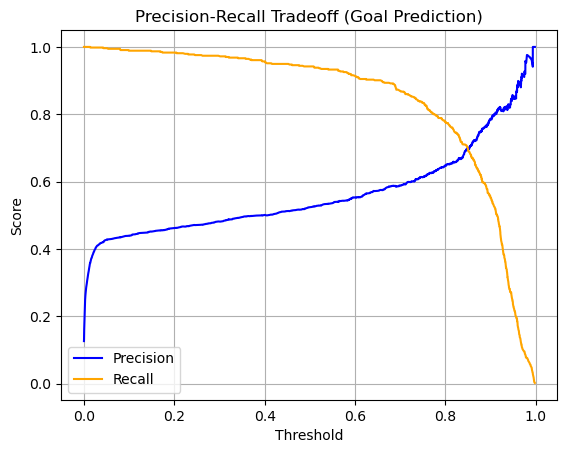

Confusion Matrix (Adjusted Threshold - Prioritize Goals):
 [[3249  458]
 [  31  504]]


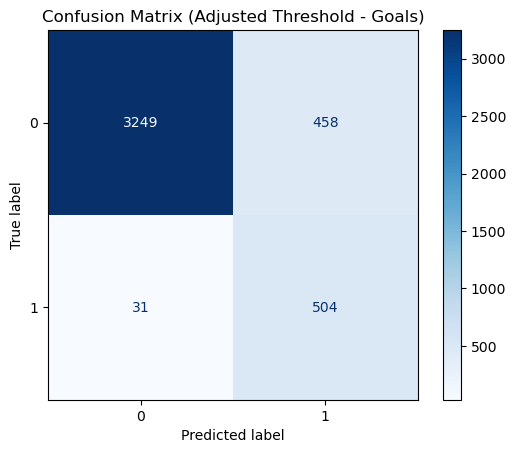

Classification Report (Adjusted Threshold - Prioritize Recall for Goals):
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      3707
           1       0.52      0.94      0.67       535

    accuracy                           0.88      4242
   macro avg       0.76      0.91      0.80      4242
weighted avg       0.93      0.88      0.90      4242



In [90]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE


# Define the model with class weights (scale_pos_weight)
xxgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled),  # Adding class weights
    use_label_encoder=False
)

# Train the model
xxgb_clf.fit(X_train, y_train)

# Get probability scores
yy_prob_xgb = xxgb_clf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, yy_prob_xgb)

# Plot the Precision-Recall curve
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Tradeoff (Goal Prediction)")
plt.grid()
plt.show()

# Set the threshold lower to maximize recall for class 1 (goals)
# For example, you can choose a threshold value where recall is higher but precision drops slightly
selected_threshold = 0.5  # Adjust the threshold based on the curve

# Apply the new threshold
yy_pred_xgb_adjusted = (yy_prob_xgb >= selected_threshold).astype(int)

# Evaluate the model with the adjusted threshold
conf_matrix = confusion_matrix(y_test, yy_pred_xgb_adjusted)
print("Confusion Matrix (Adjusted Threshold - Prioritize Goals):\n", conf_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Adjusted Threshold - Goals)')
plt.show()

# Print classification report
print("Classification Report (Adjusted Threshold - Prioritize Recall for Goals):\n", classification_report(y_test, yy_pred_xgb_adjusted))




## Catboost

In [80]:
from catboost import CatBoostClassifier


# Define and train the CatBoost model
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    loss_function="Logloss",
    eval_metric="F1",
    early_stopping_rounds=10,
    verbose=100
)

model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=(X_test, y_test)
)

# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0:	learn: 0.9194572	test: 0.6315078	best: 0.6315078 (0)	total: 79.2ms	remaining: 39.5s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.6597014925
bestIteration = 17

Shrink model to first 18 iterations.
[[3344  363]
 [  93  442]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      3707
           1       0.55      0.83      0.66       535

    accuracy                           0.89      4242
   macro avg       0.76      0.86      0.80      4242
weighted avg       0.92      0.89      0.90      4242



In [94]:

from catboost import CatBoostClassifier


# Define and train the CatBoost model
final_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    loss_function="Logloss",
    eval_metric="F1",
    early_stopping_rounds=10,
    verbose=100
)

final_model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test)
)

# Predict and evaluate
y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



0:	learn: 0.4470948	test: 0.3790524	best: 0.3790524 (0)	total: 95.2ms	remaining: 47.5s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.6827794562
bestIteration = 56

Shrink model to first 57 iterations.
[[3588  119]
 [ 196  339]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3707
           1       0.74      0.63      0.68       535

    accuracy                           0.93      4242
   macro avg       0.84      0.80      0.82      4242
weighted avg       0.92      0.93      0.92      4242



In [95]:
spatial_features = [
    "shot_distance",
    "shot_angle_degrees"
]
contextual_features = [
    "shot_first_time",
    "under_pressure",
    "time_since_last_event",
    "home_score",
    "away_score",
    "game_state_leading",
    "game_state_tied",
    "game_state_trailing",
    "period_First Half",
    "period_Second Half",
    "period_Third Period",
    "period_Fourth Period",
    "period_Penalties",
    "shot_type_Corner",
    "shot_type_Free Kick",
    "shot_type_Open Play",
    "shot_type_Penalty"
]
position_features = [c for c in X_train.columns if c.startswith("position_")]
execution_features = [
    c for c in X_train.columns 
    if c.startswith("shot_body_part_") 
    or c.startswith("shot_technique_")
]
features_to_remove = (
    contextual_features
    + position_features
    + execution_features
)

X_train_ablated = X_train.drop(columns=features_to_remove)
X_test_ablated  = X_test.drop(columns=features_to_remove)

print("Remaining features:", X_train_ablated.columns.tolist())


Remaining features: ['shot_distance', 'shot_angle_degrees']


In [96]:
from catboost import CatBoostClassifier

ablated_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    loss_function="Logloss",
    eval_metric="F1",
    early_stopping_rounds=10,
    verbose=False
)

ablated_model.fit(
    X_train_ablated,
    y_train,
    eval_set=(X_test_ablated, y_test)
)

y_pred_ablated = ablated_model.predict(X_test_ablated)

print(confusion_matrix(y_test, y_pred_ablated))
print(classification_report(y_test, y_pred_ablated))

[[3707    0]
 [ 535    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3707
           1       0.00      0.00      0.00       535

    accuracy                           0.87      4242
   macro avg       0.44      0.50      0.47      4242
weighted avg       0.76      0.87      0.82      4242



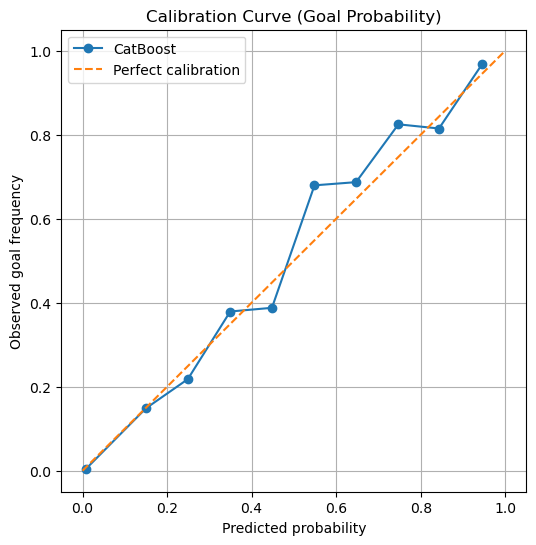

Brier score: 0.05309216481822295


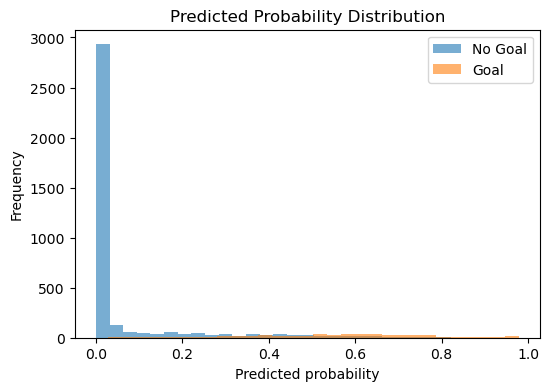

In [100]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss


y_prob = final_model.predict_proba(X_test)[:, 1]

prob_true, prob_pred = calibration_curve(
    y_test,
    y_prob,
    n_bins=10,
    strategy="uniform"
)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker="o", label="CatBoost")
plt.plot([0,1], [0,1], linestyle="--", label="Perfect calibration")
plt.xlabel("Predicted probability")
plt.ylabel("Observed goal frequency")
plt.title("Calibration Curve (Goal Probability)")
plt.legend()
plt.grid()
plt.show()



brier = brier_score_loss(y_test, y_prob)
print("Brier score:", brier)

plt.figure(figsize=(6,4))
plt.hist(y_prob[y_test == 0], bins=30, alpha=0.6, label="No Goal")
plt.hist(y_prob[y_test == 1], bins=30, alpha=0.6, label="Goal")
plt.xlabel("Predicted probability")
plt.ylabel("Frequency")
plt.legend()
plt.title("Predicted Probability Distribution")
plt.show()



